# Setting Up Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/Test_Dataset_22CS30062.csv")

In [3]:
df['Date']=pd.to_datetime(df['Date'])

In [4]:
df=df.sort_values(by=['Asset','Date'])

In [5]:
df['Rate of Return (%)']=df.groupby('Asset')['Close Price'].pct_change()*100

In [6]:
df.tail(20)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open,Asset,Rate of Return (%)
2,2024-10-04,510.00,517.35,501.60,503.45,510.604345,1345060,29756,686793480.0,354949,26.39,15.75,-6.55,ITC.BSE,-1.861598
3,2024-10-07,507.85,514.80,507.00,510.50,511.141840,522787,12217,267218309.0,217036,41.52,7.80,2.65,ITC.BSE,1.400338
4,2024-10-08,510.50,512.50,506.00,507.90,508.701721,419886,14982,213596731.0,175644,41.83,6.50,-2.60,ITC.BSE,-0.509305
5,2024-10-09,513.95,513.95,490.60,491.80,499.909186,642674,14425,321278636.0,360009,56.02,23.35,-22.15,ITC.BSE,-3.169915
6,2024-10-10,495.70,495.70,489.55,492.00,493.279637,757543,20769,373680536.0,464430,61.31,6.15,-3.70,ITC.BSE,0.040667
7,2024-10-11,492.05,493.90,487.35,488.45,489.098169,633660,13409,309921946.0,244655,38.61,6.55,-3.60,ITC.BSE,-0.721545
8,2024-10-14,491.25,498.90,488.60,496.85,494.704651,406269,14138,200983164.0,206301,50.78,10.30,5.60,ITC.BSE,1.719726
9,2024-10-15,497.15,499.40,494.50,498.55,497.784492,202364,4383,100733661.0,101500,50.16,4.90,1.40,ITC.BSE,0.342156
10,2024-10-16,497.00,498.90,492.45,493.20,496.283850,355755,10307,176555461.0,225539,63.40,6.45,-3.80,ITC.BSE,-1.073112
11,2024-10-17,494.65,494.90,487.90,488.80,490.743644,295948,13193,145234600.0,149449,50.50,7.00,-5.85,ITC.BSE,-0.892133


In [7]:
mean_return=df.groupby('Asset')['Rate of Return (%)'].mean()
mean_return

,Rate of Return (%)
Asset,
ADANI.BSE,-0.339570
APOLLO_TYRES.BSE,-0.396392
DECCAN_HEALTH.BSE,-0.313744
GODREJ.BSE,-0.633750
ITC.BSE,-0.252651


In [8]:
df['Expected Rate of Return (%)'] = df.groupby('Asset')['Rate of Return (%)'].transform('mean')

In [9]:
df.dropna(subset=['Rate of Return (%)'], inplace=True)


In [10]:
returns_df=df.pivot(index='Date',columns='Asset',values='Rate of Return (%)')
cov_matrix=returns_df.cov()
cov_matrix

Asset,ADANI.BSE,APOLLO_TYRES.BSE,DECCAN_HEALTH.BSE,GODREJ.BSE,ITC.BSE
Asset,,,,,
ADANI.BSE,6.299920,2.338774,3.847592,1.298338,-0.225328
APOLLO_TYRES.BSE,2.338774,3.263840,1.941489,1.355258,0.329012
DECCAN_HEALTH.BSE,3.847592,1.941489,3.784975,1.433597,-0.199998
GODREJ.BSE,1.298338,1.355258,1.433597,5.090666,-0.813830
ITC.BSE,-0.225328,0.329012,-0.199998,-0.813830,1.536697


# Variance Risk

## Short Selling Allowed

In [11]:
cov_matrix_inv=np.linalg.inv(cov_matrix)

In [12]:
e=np.ones(len(cov_matrix.columns))

In [13]:
optimal_weights=np.dot(cov_matrix_inv,e)/np.dot(e.T,np.dot(cov_matrix_inv,e))
optimal_weights

array([ 0.01723526, -0.01682891,  0.14828122,  0.21196927,  0.63934317])

In [14]:
Expected_return=np.dot(optimal_weights.T,mean_return)
Expected_return

-0.3415704570156225

In [15]:
weights_df=pd.DataFrame({
    'Asset':cov_matrix.columns,
    'Optimal Weight':optimal_weights
})
weights_df

,Asset,Optimal Weight
0,ADANI.BSE,0.017235
1,APOLLO_TYRES.BSE,-0.016829
2,DECCAN_HEALTH.BSE,0.148281
3,GODREJ.BSE,0.211969
4,ITC.BSE,0.639343


In [16]:
Optimal_Risk=np.sqrt(np.dot(optimal_weights.T,np.dot(cov_matrix,optimal_weights)))
Optimal_Risk

0.8780051501275884

##Return=(3/5)*(Sum of Expected Returns)

In [38]:
return_value=(3/5)*np.sum(mean_return)
return_value

-1.1616647497627166

In [39]:


A=mean_return.T@cov_matrix_inv@e
B=e.T@cov_matrix_inv@e
C=mean_return.T@cov_matrix_inv@mean_return
D=e.T@cov_matrix_inv@mean_return
den_det=np.linalg.det(np.array([[C,A],[D,B]]))
lambda1=np.linalg.det(np.array([[2*return_value,A],[2,B]]))/den_det
lambda2=np.linalg.det(np.array([[C,2*return_value],[D,2]]))/den_det
optimal_weights=0.5*(lambda1*(cov_matrix_inv@mean_return)+lambda2*(cov_matrix_inv@e))
risk_value=np.sqrt(np.dot(optimal_weights.T,np.dot(cov_matrix,optimal_weights)))

In [40]:
optimal_weights

array([ 0.4328258 ,  0.68580071, -1.76254293,  2.31041053, -0.6664941 ])

In [42]:
weights_df=pd.DataFrame({
    'Asset':cov_matrix.columns,
    'Optimal Weight':optimal_weights
})
weights_df

,Asset,Optimal Weight
0,ADANI.BSE,0.432826
1,APOLLO_TYRES.BSE,0.685801
2,DECCAN_HEALTH.BSE,-1.762543
3,GODREJ.BSE,2.310411
4,ITC.BSE,-0.666494


In [43]:
expected_return=np.dot(optimal_weights.T,mean_return)
expected_return#Verified the solution

-1.1616647497627137

In [46]:
Risk_value=np.sqrt(np.dot(optimal_weights.T,np.dot(cov_matrix,optimal_weights)))
print(f"Minimum Risk(%) : {Risk_value}")

Minimum Risk(%) : 5.49872150222668


# Markowitz Curve

In [23]:
returns=np.linspace(-0.8,3,10000)
risk_values=[]

for return_value in returns:

  A=mean_return.T@cov_matrix_inv@e
  B=e.T@cov_matrix_inv@e
  C=mean_return.T@cov_matrix_inv@mean_return
  D=e.T@cov_matrix_inv@mean_return
  den_det=np.linalg.det(np.array([[C,A],[D,B]]))
  lambda1=np.linalg.det(np.array([[2*return_value,A],[2,B]]))/den_det
  lambda2=np.linalg.det(np.array([[C,2*return_value],[D,2]]))/den_det
  optimal_w=0.5*(lambda1*(cov_matrix_inv@mean_return)+lambda2*(cov_matrix_inv@e))
  risk_value=np.sqrt(np.dot(optimal_w.T,np.dot(cov_matrix,optimal_w)))
  risk_values.append(risk_value)

min_risk_idx=np.argmin(risk_values)
min_risk_return=returns[min_risk_idx]
min_risk_value=risk_values[min_risk_idx]


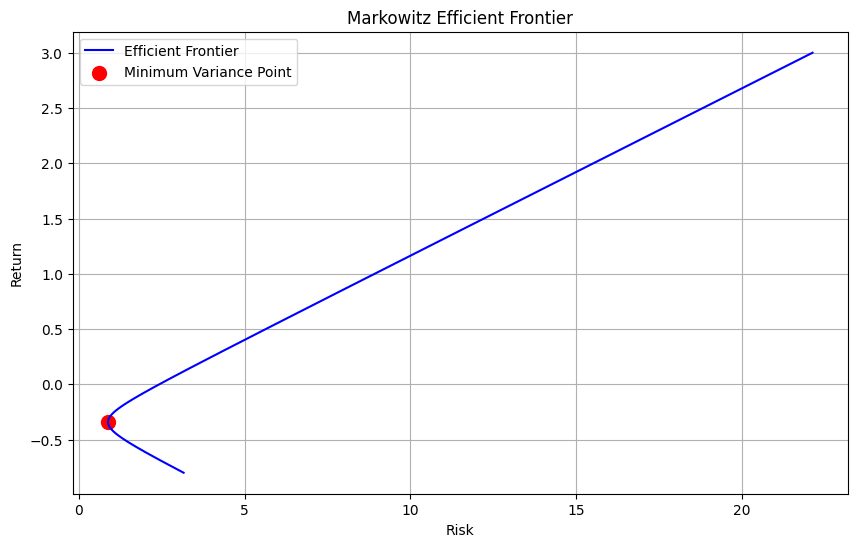

Minimum Variance Point: Return=-0.3416741674167417, Risk=0.8780054184747671


In [24]:
plt.figure(figsize=(10,6))
plt.plot(risk_values,returns,color='b',linestyle='-',label='Efficient Frontier')
plt.scatter(min_risk_value,min_risk_return,color='r',s=100,label='Minimum Variance Point')
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Markowitz Efficient Frontier')
plt.legend()
plt.grid(True)
plt.show()
print(f"Minimum Variance Point: Return={min_risk_return}, Risk={min_risk_value}")

# Market Portfolio(Market Point & Sharpe Ratio)

In [25]:
return_f=-1#(It is taken negative to cope with the bearish market so that CML still corresponds with Markowitz curve)
w_mt=np.dot(cov_matrix_inv,(mean_return-return_f*e))/np.dot(e.T,np.dot(cov_matrix_inv,(mean_return-return_f*e)))

In [26]:
risk_mt=np.sqrt(np.dot(w_mt.T,np.dot(cov_matrix,w_mt)))
return_mt=np.dot(w_mt.T,mean_return)
print(risk_mt)
print(return_mt)

0.895646096339661
-0.3148462217461554


In [30]:
sharpe_ratio=(return_mt-return_f)/risk_mt
print(f"Sharpe Ratio:{sharpe_ratio}")

Sharpe Ratio:0.7649827103070517


In [27]:
def CML(risk):
  return return_f+((return_mt-return_f)/risk_mt)*risk

In [28]:
risk_vals=np.linspace(-0.8,3,1000)
CML_vals=[CML(risk) for risk in risk_vals]

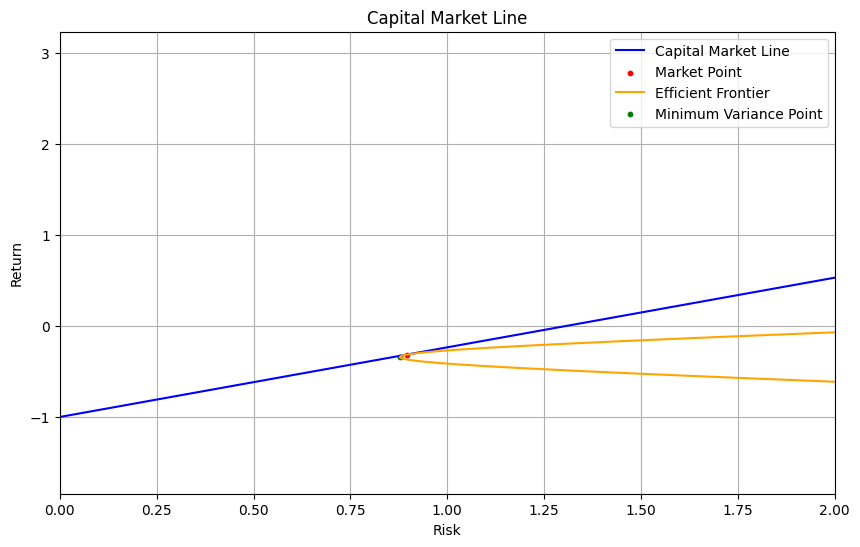

Market Point: Return=-0.3148462217461554, Risk=0.895646096339661


In [29]:
plt.figure(figsize=(10,6))
plt.plot(risk_vals,CML_vals,color='b',linestyle='-',label='Capital Market Line')
plt.scatter(risk_mt,return_mt,color='r',s=10,label='Market Point')
plt.plot(risk_values,returns,color='orange',linestyle='-',label='Efficient Frontier')
plt.scatter(min_risk_value,min_risk_return,color='g',s=10,label='Minimum Variance Point')
plt.xlabel('Risk')
plt.xlim(0,2)
plt.ylabel('Return')
plt.title('Capital Market Line')
plt.legend()
plt.grid(True)
plt.show()
print(f"Market Point: Return={return_mt}, Risk={risk_mt}")

# Beta of Portfolio

In [33]:
#SML:return=return_f+(return_mt-return_f)*beta
#Beta of Portfolio=sum of(wi*beta_i)
def individual_beta(mean):
  return (mean-return_f)/(return_mt-return_f)

beta_assets=[]
for i in range(len(mean_return)):
  beta_assets.append(individual_beta(mean_return[i]))

beta_of_portfolio=np.dot(optimal_weights,beta_assets)
print(f"Beta of The Portfolio:{beta_of_portfolio}")


Beta of The Portfolio:0.9600756348970776


<ipython-input-33-92c37ddf8f06>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_assets.append(individual_beta(mean_return[i]))







# MAD

## Short Selling Allowed

In [47]:
import numpy as np
from scipy.optimize import linprog


T = 21  # Number of time periods (example)
n = 5 # Number of assets (example)

r=df.pivot(index='Date',columns='Asset',values='Rate of Return (%)')
r=r.to_numpy()
r
mu=mean_return


# Decision variables: y_t (T), w_j (n)
c = np.concatenate([np.zeros(T), np.ones(n)])  # Objective function coefficients (for min 1/T sum y_t + w_j's)

# Create A_ub matrix for constraints
A_ub = []
b_ub = []

# Constraints 1 and 2: y_t >= sum_j (rjt - mu_j) * w_j and y_t >= -sum_j (rjt - mu_j) * w_j
for t in range(T):
    row = np.zeros(T + n)
    row[t] = -1  # Corresponding to y_t
    row[T + np.arange(n)] = r[t] - mu  # Corresponding to w_j * (rjt - mu_j)
    A_ub.append(row)
    b_ub.append(0)

    row = np.zeros(T + n)
    row[t] = -1  # Corresponding to y_t
    row[T + np.arange(n)] = -(r[t] - mu)  # Corresponding to w_j * -(rjt - mu_j)
    A_ub.append(row)
    b_ub.append(0)

# Constraint 3: sum(w_j) = 1
A_eq = np.zeros((1, T + n))
A_eq[0, T:] = 1  # sum of w_j (for all j)
b_eq = [1]  # sum(w_j) = 1




bounds = [(None, None)] * T + [(None, None)] * n  # y_t can be any real number, w_j can be any real number

# Solve the linear programming problem
result = linprog(c, A_ub=np.array(A_ub), b_ub=np.array(b_ub), A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Display the result
if result.success:
    print("Optimal value:", result.fun)
    print("Optimal y_t values:", result.x[:T])
    print("Optimal w_j values:", result.x[T:])
else:
    print("Optimization failed:", result.message)


Optimal value: 1.0
Optimal y_t values: [1.7940017  0.11177618 2.66227876 5.30409751 0.07891907 0.98659364
 0.79647108 0.89399416 0.52191362 0.26283938 2.03605767 0.0789634
 1.9238145  3.47468894 0.74497328 0.0768578  4.42115596 4.30252085
 1.80362068 4.78096462 0.36806035]
Optimal w_j values: [1. 0. 0. 0. 0.]


In [48]:
MAD_return=result.x[T:]@mean_return
MAD_risk=1/T*np.sum(result.x[:T])
print(MAD_return)
print(MAD_risk)

-0.3395702627412559
1.7821220546557444


## Total Return=(3/5)*(Sum of Expected Returns)

In [49]:
import numpy as np
from scipy.optimize import linprog


T = 21  # Number of time periods (example)
n = 5 # Number of assets (example)
k = (3/5)*np.sum(mean_return) # Constant k (example)
r=df.pivot(index='Date',columns='Asset',values='Rate of Return (%)')
r=r.to_numpy()
r
mu=mean_return


# Decision variables: y_t (T), w_j (n)
c = np.concatenate([np.zeros(T), np.ones(n)])  # Objective function coefficients (for min 1/T sum y_t + w_j's)

# Create A_ub matrix for constraints
A_ub = []
b_ub = []

# Constraints 1 and 2: y_t >= sum_j (rjt - mu_j) * w_j and y_t >= -sum_j (rjt - mu_j) * w_j
for t in range(T):
    row = np.zeros(T + n)
    row[t] = -1  # Corresponding to y_t
    row[T + np.arange(n)] = r[t] - mu  # Corresponding to w_j * (rjt - mu_j)
    A_ub.append(row)
    b_ub.append(0)

    row = np.zeros(T + n)
    row[t] = -1  # Corresponding to y_t
    row[T + np.arange(n)] = -(r[t] - mu)  # Corresponding to w_j * -(rjt - mu_j)
    A_ub.append(row)
    b_ub.append(0)

# Constraint 3: sum(w_j) = 1
A_eq = np.zeros((1, T + n))
A_eq[0, T:] = 1  # sum of w_j (for all j)
b_eq = [1]  # sum(w_j) = 1

# Constraint 4: mu^T w >= k
A_ub.append(np.concatenate([np.zeros(T), mu]))  # mu^T w
b_ub.append(k)

# Constraint 5: w_j >= 0 for all j
bounds = [(None, None)] * T + [(None, None)] * n  # y_t can be any real number, w_j can be any real number

# Solve the linear programming problem
result = linprog(c, A_ub=np.array(A_ub), b_ub=np.array(b_ub), A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Display the result
if result.success:
    print("Optimal value:", result.fun)
    print("Optimal y_t values:", result.x[:T])
    print("Optimal w_j values:", result.x[T:])
else:
    print("Optimization failed:", result.message)


Optimal value: 1.0000000000000002
Optimal y_t values: [11.31580789  2.22520161  0.86912187  0.09601022  3.85938331  7.1141691
  2.94045231  4.6462739  11.54144162  4.42806413  1.80842312  1.64849049
  0.44001925  5.93629943  0.09527162 12.68706138  0.70910721  3.85214722
  3.16998194  6.03274426  4.8669581 ]
Optimal w_j values: [ 0.          0.         -1.64970619  2.64970619  0.        ]


In [50]:
MAD_return=result.x[T:]@mean_return
MAD_risk=1/T*np.sum(result.x[:T])
print(MAD_return)
print(MAD_risk)

-1.1616647497627168
4.299163332290565


#MINMAX

## Short Selling Allowed

In [102]:
import numpy as np
from scipy.optimize import linprog

T = 21  # Number of time periods
n = 5   # Number of assets

r = df.pivot(index='Date', columns='Asset', values='Rate of Return (%)').to_numpy()
mu = mean_return

# Decision variables: y, w_1, w_2, ..., w_n
# Objective function: Maximize y  => Minimize -y
c = np.concatenate([[-1], np.zeros(n)])

# Inequality constraints (A_ub * x <= b_ub)
A_ub = []
b_ub = []

for t in range(T):
    row1 = np.zeros(n + 1)
    row1[0] = 1  # Corresponding to -y
    row1[1:] = np.abs((r[t] - mu)) / T  # Corresponding to (rjt - mu_j) * w_j / T
    A_ub.append(row1)
    b_ub.append(0)



# Equality constraint (A_eq * x == b_eq)
A_eq = [[0, 1, 1, 1, 1, 1]]  # sum of w_j = 1
b_eq = [1]



# Bounds for variables
bounds = [(None, None)] + [(0, None)] * n  # y is unbounded, w can be any real number

# Solve the LPP
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Display the results
if result.success:
    print("Optimal value (y):", -result.fun)  # Since we minimized -y
    print("Optimal weights (w):", result.x[1:])
else:
    print("Optimization failed:", result.message)

Optimal value (y): -0.08656704845014726
Optimal weights (w): [0.03412745 0.34106118 0.07672113 0.         0.54809024]


In [91]:
MINMAX_risk=result.fun
print(f"MINMAX Risk:{MINMAX_risk}")


MINMAX Risk:0.08548738852626421


## Total Return=(3/5)*(Sum of Expected Returns)

In [90]:
import numpy as np
from scipy.optimize import linprog

T = 21  # Number of time periods
n = 5   # Number of assets
k = (3/5) * np.sum(mean_return)  # Constant k
r = df.pivot(index='Date', columns='Asset', values='Rate of Return (%)').to_numpy()
mu = mean_return

# Decision variables: y, w_1, w_2, ..., w_n
# Objective function: Maximize y  => Minimize -y
c = np.concatenate([[-1], np.zeros(n)])

# Inequality constraints (A_ub * x <= b_ub)
A_ub = []
b_ub = []

for t in range(T):
    row1 = np.zeros(n + 1)
    row1[0] = 1  # Corresponding to -y
    row1[1:] = np.abs((r[t] - mu)) / T  # Corresponding to (rjt - mu_j) * w_j / T
    A_ub.append(row1)
    b_ub.append(0)

# Equality constraint (A_eq * x == b_eq)
A_eq = [[0, 1, 1, 1, 1, 1]]  # sum of w_j = 1
b_eq = [1]

# Additional constraint: mu.T * w >= k
A_ub.append(np.concatenate([[0], -mu]))  # -mu.T * w <= -k
b_ub.append(-k)

# Bounds for variables
bounds = [(None, None)] + [(None, None)] * n  # y is unbounded, w can be any real number

# Solve the LPP
result = linprog(c, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Display the results
if result.success:
    print("Optimal value (y):", -result.fun)  # Since we minimized -y
    print("Optimal weights (w):", result.x[1:])
else:
    print("Optimization failed:", result.message)

Optimal value (y): -0.08548738852626421
Optimal weights (w): [ 0.02110068  0.36380639  0.07508444 -0.01653891  0.55654741]


In [84]:
print(np.sum(result.x[1:]))#Verification

1.0


In [103]:
MINMAX_risk=result.fun
print(f"MINMAX Risk:{MINMAX_risk}")

MINMAX Risk:0.08656704845014726


# CVaR Estimation

In [51]:
confidence_level = 0.95
losses = -mean_return
VaR = np.percentile(losses, (1 - confidence_level) * 100)
print("Value-at-Risk (VaR) for MAD Model:", VaR)

Value-at-Risk (VaR) for MAD Model: 0.2648699067364098


In [52]:
CVaR = losses[losses <= VaR].mean()
print(f"Conditional Value at Risk (CVaR) for 95% confidence level : {CVaR}")

Conditional Value at Risk (CVaR) for 95% confidence level : 0.25265134444102333


# MOP

## Variance Risk

In [53]:
def portfolio_variance(weights, cov_matrix):
    return weights.T @ cov_matrix @ weights

In [54]:
def objective_function(weights, cov_matrix, expected_returns, risk_func, risk_weight, return_weight):
    risk = risk_func(weights, cov_matrix)
    portfolio_return = weights @ expected_returns
    return risk_weight * risk - return_weight * portfolio_return

In [55]:
from scipy.optimize import minimize
constraints = (
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
)

n_assets=len(mean_return)
bounds = tuple((0, 1) for _ in range(n_assets))


def optimize_portfolio(risk_func, risk_weight, return_weight):
    x0 = np.array(n_assets * [1. / n_assets])
    result = minimize(
        objective_function,
        x0,
        args=(cov_matrix, mean_return, risk_func, risk_weight, return_weight),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    if result.success:
        optimized_weights = result.x
        optimized_risk = risk_func(optimized_weights, cov_matrix)
        optimized_return = optimized_weights @ mean_return
        return optimized_weights, optimized_risk, optimized_return
    else:
        raise BaseException(result.message)

In [57]:
weights, risk, ret = optimize_portfolio(portfolio_variance, 1/3, 2/3)

In [61]:
print("Optimal weights: ")
print(weights)
print("Risk: ", risk)
print("Return: ", ret)


Optimal weights: 
[5.63785130e-18 0.00000000e+00 1.90871115e-01 1.46445501e-01
 6.62683384e-01]
Risk:  0.7934989887718467
Return:  -0.32012233277985525


## MAD Risk

In [64]:
def portfolio_MAD(weights, mean_return):
    x=np.sum(weights*mean_return)
    return np.mean(np.abs(x-np.mean(x)))

In [65]:
def objective_function(weights,mean_return, expected_returns, risk_func, risk_weight, return_weight):
    risk = risk_func(weights, mean_return)
    portfolio_return = weights @ expected_returns
    return risk_weight * risk - return_weight * portfolio_return

In [75]:
from scipy.optimize import minimize
constraints = (
    {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
)

n_assets=len(mean_return)
bounds = tuple((0, 1) for _ in range(n_assets))


def optimize_portfolio(risk_func, risk_weight, return_weight):
    x0 = np.array(n_assets * [1. / n_assets])
    result = minimize(
        objective_function,
        x0,
        args=( weights,mean_return, risk_func, risk_weight, return_weight),
        method='SLSQP',
        bounds=bounds,
        constraints=constraints
    )
    if result.success:
        optimized_weights = result.x
        optimized_risk = risk_func(optimized_weights, mean_return)
        optimized_return = optimized_weights @ mean_return
        return optimized_weights, optimized_risk, optimized_return
    else:
        raise BaseException(result.message)

In [76]:
weights, risk, ret = optimize_portfolio(portfolio_MAD, 1/3, 2/3)

In [77]:
print("Optimal weights: ")
print(weights)
print("Risk: ", risk)
print("Return: ", ret)

Optimal weights: 
[1.98602732e-16 3.52434888e-16 0.00000000e+00 3.51988268e-16
 1.00000000e+00]
Risk:  0.0
Return:  -0.2526513444410237
